<a href="https://colab.research.google.com/github/VU-CSP/popgrowth_assignment-WahoskiClaudia/blob/main/PopGrowthLecture_assignment_CCW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Claudia Wahoski


In [ ]:
#import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [ ]:
#load custom functions from class example
if IN_COLAB and not os.path.exists("growth_fxns.py"):
    !wget "https://raw.githubusercontent.com/VU-CSP/quantbio-assignments/main/growth_fxns.py"
from growth_fxns import *

In [ ]:
#Adjust seaborn settings
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [ ]:
#load datatset
if IN_COLAB and not os.path.exists("MCF10A_trametinib.csv"):
    !wget "https://raw.githubusercontent.com/VU-CSP/quantbio-assignments/main/MCF10A_trametinib.csv"
dat = pd.read_csv("MCF10A_trametinib.csv") #data is in the object d
dat.head() #first 5 rows of the data

,well,time,cell.count,uid,drug1,drug1.conc
0,A01,0.8,32,10ACh-28A_H03,trametinib,0.000004
1,A01,5.6,25,10ACh-28A_H03,trametinib,0.000004
2,A01,10.5,31,10ACh-28A_H03,trametinib,0.000004
3,A01,15.3,53,10ACh-28A_H03,trametinib,0.000004
4,A01,20.0,39,10ACh-28A_H03,trametinib,0.000004


Copy and execute a chunk of code from the line assigning values to d["pd"]. Describe what you did and the output

In [ ]:
#look at dataframe
dat

,well,time,cell.count,uid,drug1,drug1.conc
0,A01,0.8,32,10ACh-28A_H03,trametinib,0.000004
1,A01,5.6,25,10ACh-28A_H03,trametinib,0.000004
2,A01,10.5,31,10ACh-28A_H03,trametinib,0.000004
3,A01,15.3,53,10ACh-28A_H03,trametinib,0.000004
4,A01,20.0,39,10ACh-28A_H03,trametinib,0.000004
...,...,...,...,...,...,...
295,A12,96.7,60,10ACh-28B_H03,trametinib,0.000004
296,A12,101.8,60,10ACh-28B_H03,trametinib,0.000004
297,A12,106.9,61,10ACh-28B_H03,trametinib,0.000004
298,A12,112.0,64,10ACh-28B_H03,trametinib,0.000004


In [ ]:
#from the class notebook
dat.insert(2,"l2",np.empty_like(dat["cell.count"]))
dat.insert(3,"pd",np.empty_like(dat["cell.count"]))
dat["l2"] = np.round(np.log2(dat["cell.count"]),3)
dat["pd"] = flatten_matrix([np.round(dat[dat["well"]==w]["l2"] - dat[dat["well"]==w]["l2"].to_list()[0],3) for w in dat["well"].unique()]) #normalize based on the first timepoint of each well
#all the wells are in a single column, so the last line of code takes the values based on the first one in the series so calculations are based on the first timepoint for a well
#inserting calculations for log2 and population doublings
#first two lines, add two empty columns with the same column of cell count
#numbers tell the position of the new column

In [ ]:
dat

,well,time,l2,pd,cell.count,uid,drug1,drug1.conc
0,A01,0.8,5.000,0.000,32,10ACh-28A_H03,trametinib,0.000004
1,A01,5.6,4.644,-0.356,25,10ACh-28A_H03,trametinib,0.000004
2,A01,10.5,4.954,-0.046,31,10ACh-28A_H03,trametinib,0.000004
3,A01,15.3,5.728,0.728,53,10ACh-28A_H03,trametinib,0.000004
4,A01,20.0,5.285,0.285,39,10ACh-28A_H03,trametinib,0.000004
...,...,...,...,...,...,...,...,...
295,A12,96.7,5.907,0.778,60,10ACh-28B_H03,trametinib,0.000004
296,A12,101.8,5.907,0.778,60,10ACh-28B_H03,trametinib,0.000004
297,A12,106.9,5.931,0.802,61,10ACh-28B_H03,trametinib,0.000004
298,A12,112.0,6.000,0.871,64,10ACh-28B_H03,trametinib,0.000004


In [ ]:
#chunk 1
d["well"].unique()
#this returns all the unique values that are in column "well"

array(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09',
       'A10', 'A11', 'A12'], dtype=object)

In [ ]:
#chunk 2
for w in d["well"].unique()
#for loop that says to iterate the function for each unique well value

SyntaxError: ignored

In [ ]:
#chunk 3
[np.round(dat[dat["well"]==w]["l2"] - dat[dat["well"]==w]["l2"].to_list()[0],3)
#makes a list that subtracts the vlaue in the l2 column in the current iteration from the value in the l2 column at the first position
 #this allows you to calculate population doublings and compare to the initial population size (first value in the well notated by [0])
 #the value is then appended to a list and then rounded to 3 decimal places

Assignment Task 2
Generate a scatterplot for population doublings over time for the wells A04, A05, and A07. Describe the difference seen between the population doublings graph and the graph of the data in log2 scale

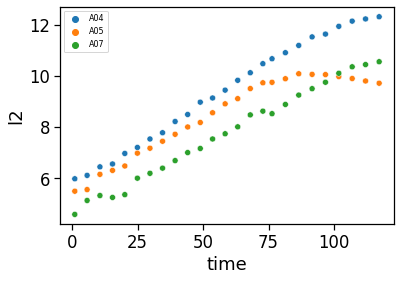

In [ ]:
#code for log2 scatterplot
#look at 3 of the wells
# dtp = data to plot
dtp = dat[(dat["well"] == "A04") | (dat["well"] == "A05") | (dat["well"] == "A07")]
sns.scatterplot(data=dtp, x="time", y="l2", hue="well")
plt.legend(loc='upper left', fontsize='8')

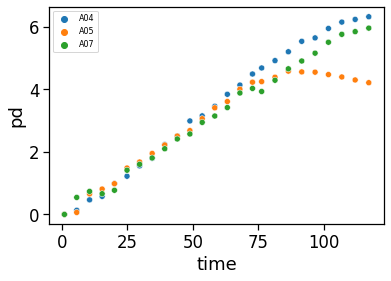

In [ ]:
#add code for pd scatterplot

#look at 3 of the wells
# dtp = data to plot
dtp = dat[(dat["well"] == "A04") | (dat["well"] == "A05") | (dat["well"] == "A07")]
sns.scatterplot(data=dtp, x="time", y="pd", hue="well")
plt.legend(loc='upper left', fontsize='8')

Describe the differences between the two graphs

Assignment Task 3
Perform linear regression using the linregress function on the trametinib-treated wells. Describe how well the proliferation rates compare to the rates of the control wells.

In [ ]:
from scipy.stats import linregress

In [ ]:
# dtf = data to fit, only data in d with drug concentrations that is not equal to 0
#means thee wells were treated
dtf = dat[dat["drug1.conc"]!=0]
treated_wells = dtf["well"].unique()

In [ ]:
res = [linregress(dtf[dtf["well"]==treated_wells[i]][["time","l2"]]) for i in np.arange(len(treated_wells))]
#each iterated item becomes an object in the list
#each object is the linear regression function applied to the data for that well, using only time and log2 columns 

In [ ]:
#check
example_well = dtf["well"].unique()[1]
print(f"Example linregress output for well {example_well}")
res[1]

Example linregress output for well A12


LinregressResult(slope=0.0018027181675447268, intercept=5.804797993779366, rvalue=0.2947633020923504, pvalue=0.1526106083686435, stderr=0.001218577477198253, intercept_stderr=0.08275694027457718)

In [ ]:
#slope values
prates = pd.Series(data=[np.round(r.slope,4) for r in res], index=treated_wells)
prates

A01    0.0013
A12    0.0018
dtype: float64

In [ ]:
#check for goodness of fit
r2_vals = pd.Series(data=[np.round(r.rvalue**2,4) for r in res], index=treated_wells)
r2_vals

A01    0.0234
A12    0.0869
dtype: float64

Assignment task: Extra credit